In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Housing.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [51]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_range'],
      dtype='object')

In [62]:
data_cols = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living'
		              ,'floors', 'waterfront', 'view', 'grade'
                  ,'sqft_above', 'sqft_basement', 'yr_renovated'
                  ,'lat','sqft_lot15', 'price_range']]
data_cols

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15,price_range
0,7229300521,231300.0,2,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,5650,"(75000.0, 837500.0]"
1,6414100192,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,7639,"(75000.0, 837500.0]"
2,5631500400,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,8062,"(75000.0, 837500.0]"
3,2487200875,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,5000,"(75000.0, 837500.0]"
4,1954400510,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,7503,"(75000.0, 837500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1509,"(75000.0, 837500.0]"
21609,6600060120,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,7200,"(75000.0, 837500.0]"
21610,1523300141,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,2007,"(75000.0, 837500.0]"
21611,291310100,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1287,"(75000.0, 837500.0]"


In [63]:
print(data_cols.describe().astype('int'))

data['zipcode'].nunique()

               id    price  bedrooms  bathrooms  sqft_living  floors  \
count       21612    21612     21612      21612        21612   21612   
mean   4580359785   540110         3          2         2079       1   
std    2876625495   367121         0          0          918       0   
min       1000102    78000         0          0          290       1   
25%    2123049189   321987         3          1         1429       1   
50%    3904930470   450000         3          2         1910       1   
75%    7308900456   645000         4          2         2550       2   
max    9900000190  7700000        33          8        13540       3   

       waterfront   view  grade  sqft_above  sqft_basement  yr_renovated  \
count       21612  21612  21612       21612          21612         21612   
mean            0      0      7        1788            291            84   
std             0      0      1         828            442           401   
min             0      0      1         290    

70

In [69]:
data.loc[(data['bathrooms'] <1) | (data['bedrooms'] < 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
208,1222000055,20141123T000000,180250.0,2,0.75,900,9600,1.0,0,0,...,900,0,1941,0,98166,47.4604,-122.339,1250,14280,"(75000.0, 837500.0]"
264,2123039032,20141027T000000,369900.0,1,0.75,760,10079,1.0,1,4,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,"(75000.0, 837500.0]"
350,7325600160,20140604T000000,299000.0,1,0.75,560,12120,1.0,0,0,...,560,0,1967,0,98014,47.6750,-121.854,1300,19207,"(75000.0, 837500.0]"
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,"(75000.0, 837500.0]"
569,4045500710,20141218T000000,405000.0,2,0.75,1160,15029,1.0,0,0,...,870,290,1937,0,98014,47.6929,-121.870,1870,25346,"(75000.0, 837500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,2114700090,20150301T000000,151000.0,2,0.75,720,5040,1.0,0,0,...,720,0,1949,0,98106,47.5323,-122.347,1290,4120,"(75000.0, 837500.0]"
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,290,0,1963,0,98024,47.5308,-121.888,1620,22850,"(75000.0, 837500.0]"
20017,1025039168,20140923T000000,290000.0,1,0.75,740,1284,1.0,0,0,...,740,0,1928,0,98107,47.6741,-122.406,1430,3988,"(75000.0, 837500.0]"
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"(75000.0, 837500.0]"


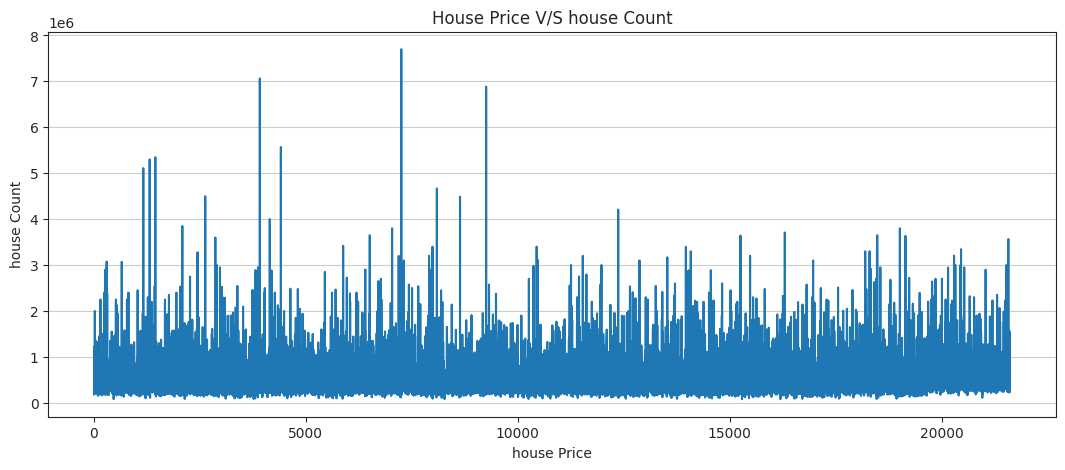

In [70]:
plt.figure(figsize=(13, 5))
plt.plot(data_cols['price'])
plt.xlabel('house Price')
plt.ylabel('house Count')
plt.title('House Price V/S house Count')
plt.grid(axis='y')
plt.show()

[  78000.  840200. 1602400. 2364600. 3126800. 3889000. 4651200. 5413400.
 6175600. 6937800. 7700000.]


<ipython-input-65-b53d7a3cf346>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cols['price_range'] = pd.cut(data_cols['price'],bins = bins)


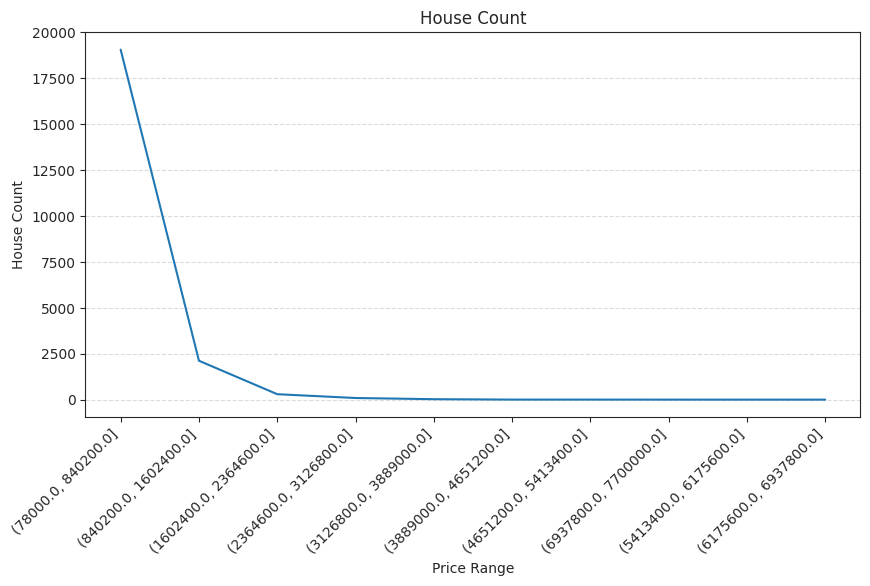

In [65]:
num_bin = 10
strt_bin = data_cols['price'].min()
stop_bin = data_cols['price'].max()
bins = np.linspace(strt_bin, stop_bin, num_bin + 1)
print(bins)
data_cols['price_range'] = pd.cut(data_cols['price'],bins = bins)
val_cnt=  data_cols['price_range'].value_counts()

plt.figure(figsize=(10, 5))
plt.plot(val_cnt.index.astype(str), val_cnt.values)
plt.xlabel('Price Range')
plt.xticks(rotation = 45, ha = "right")
plt.ylabel('House Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('House Count')
plt.show()

Here from the graph we need to apply the normlization technique.

In [66]:
for i in data_cols.columns:
  print(f'{i} " {data[i].nunique()}')

id " 21435
price " 4028
bedrooms " 13
bathrooms " 30
sqft_living " 1038
floors " 6
waterfront " 2
view " 5
grade " 12
sqft_above " 946
sqft_basement " 306
yr_renovated " 70
lat " 5034
sqft_lot15 " 8688
price_range " 10


In [68]:
dt = data_cols.isnull().any(axis=1)
data_cols[dt]

data['price_range'].unique() #(75000.0, 837500.0]

data['price_range'].fillna()

[(75000.0, 837500.0], (837500.0, 1600000.0], (1600000.0, 2362500.0], (2362500.0, 3125000.0], (4650000.0, 5412500.0], (3125000.0, 3887500.0], (3887500.0, 4650000.0], (6937500.0, 7700000.0], (5412500.0, 6175000.0], (6175000.0, 6937500.0]]
Categories (10, interval[float64, right]): [(75000.0, 837500.0] < (837500.0, 1600000.0] <
                                            (1600000.0, 2362500.0] < (2362500.0, 3125000.0] < ... <
                                            (4650000.0, 5412500.0] < (5412500.0, 6175000.0] <
                                            (6175000.0, 6937500.0] < (6937500.0, 7700000.0]]

Here we have only one row where we are having one Null value.

In [85]:
# we will add the mean value in for the data where id is same.
data_cols[data_cols['id'].isin(data_cols[data_cols['id'].duplicated()].id)].sort_values('id').groupby('id')['price'].mean()




,price
id,
1000102,290000.0
7200179,162500.0
109200390,247500.0
123039336,196450.0
251300110,291500.0
...,...
9407110710,258500.0
9809000020,1917500.0
9828200460,345000.0


In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_range'],
      dtype='object')

In [9]:
data[['id','date','price','bedrooms','bathrooms','sqft_living','zipcode']].head(1000)

,id,date,price,bedrooms,bathrooms,sqft_living,zipcode
0,7229300521,20141013T000000,231300.0,2,1.00,1180,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,98074
...,...,...,...,...,...,...,...
995,7437100570,20140821T000000,291000.0,4,2.50,1860,98038
996,8856004730,20140917T000000,199950.0,2,2.75,1590,98001
997,3856902996,20140804T000000,553500.0,2,1.00,850,98105
998,1442800370,20150415T000000,189950.0,2,1.00,1030,98038


In [10]:
data.groupby('zipcode').agg(
                                          mean_p = ('price','mean'),
                                          count_p = ('price','count')
).astype(int)

,mean_p,count_p
zipcode,,
98001,280804,362
98002,234284,199
98003,294111,280
98004,1355927,317
98005,810164,168
...,...,...
98177,676185,255
98178,310648,262
98188,289078,136


In [11]:
data['price'].max() #7700000.0

data[data['price'] == 7700000.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,"(6937500.0, 7700000.0]"


In [48]:
pd.DataFrame(data.groupby('zipcode')['price'].count().astype(int)).sort_values('price',ascending=False)

,price
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
...,...
98102,105
98010,100
98024,81


In [13]:
data.dropna(inplace=True)

In [14]:
x = data.drop(['price','price_range','date'], axis=1)
y = data['price']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
x_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3759,561000300,3,3.75,1950,8625,1.0,0,0,3,8,1360,590,1959,0,98178,47.5050,-122.258,1950,6670
1080,7888400560,4,2.75,1810,8677,1.5,0,0,3,7,1810,0,1962,0,98198,47.3668,-122.310,1740,8677
17685,3344500210,4,2.25,1240,21190,1.0,0,0,3,8,910,330,1974,0,98056,47.5123,-122.197,1760,8200
1419,4292300024,3,1.50,1430,12199,1.0,0,0,3,7,1130,300,1948,0,98133,47.7352,-122.330,1490,8196
20346,5379805260,4,3.50,2260,30250,2.0,0,0,3,7,2260,0,2013,0,98188,47.4493,-122.281,1270,16350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,1562200240,3,2.25,2160,15360,1.0,0,0,3,8,1410,750,1965,2000,98007,47.6232,-122.138,2180,8480
16966,9839300285,3,2.50,2100,2200,2.0,0,0,4,7,1500,600,1919,0,98122,47.6140,-122.294,1750,4400
9134,4222300040,3,1.50,1590,8256,1.0,0,1,3,7,1090,500,1969,0,98003,47.3488,-122.304,1950,7840
9558,8732040820,3,1.75,1820,8740,1.0,0,0,4,8,1820,0,1987,0,98023,47.3074,-122.385,2210,8320


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

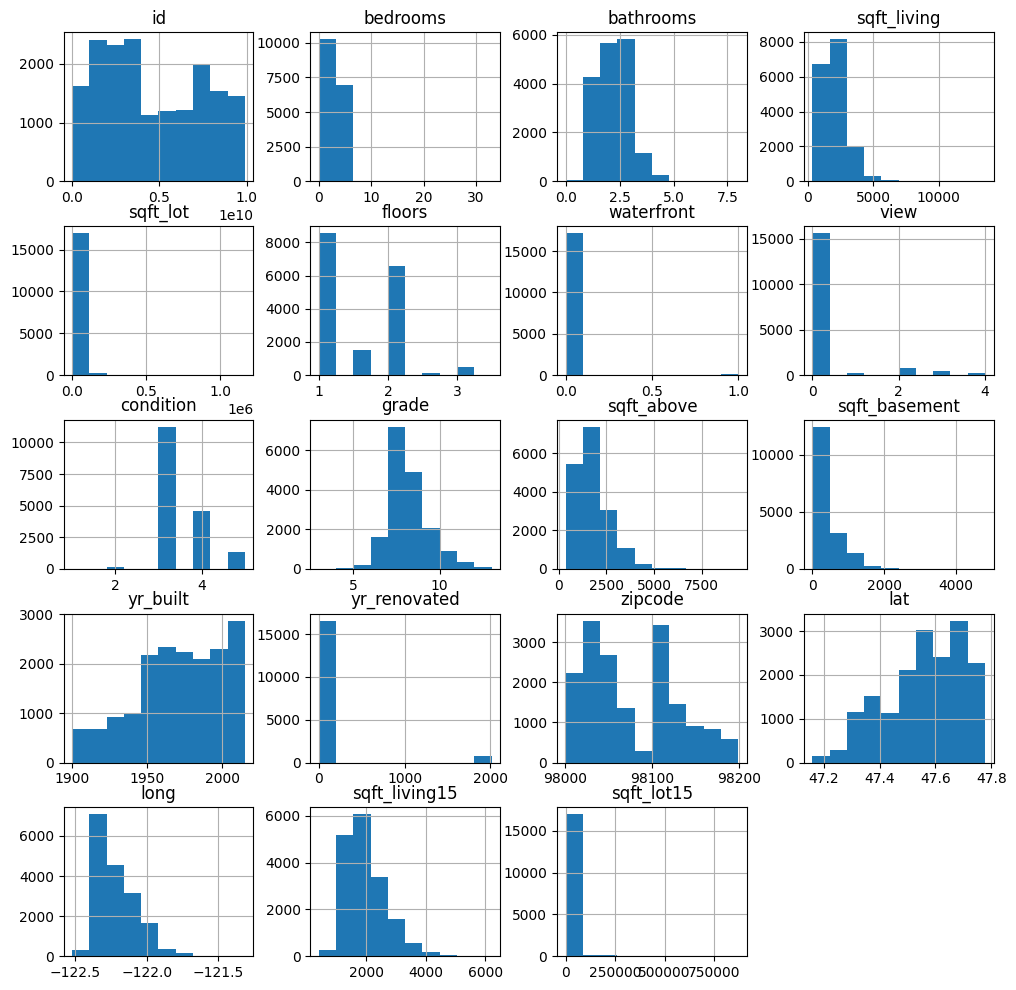

In [17]:
x_train.hist(figsize=(12,12))

In [18]:
x_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.001726,0.002798,-0.018227,-0.136008,0.011412,-0.003057,0.008447,-0.024799,0.000865,-0.017683,-0.004759,0.021166,-0.014135,-0.006424,0.003494,0.019151,-0.004311,-0.139227
bedrooms,-0.001726,1.000000,0.511547,0.569816,0.029069,0.179244,0.002612,0.074344,0.025414,0.348289,0.476393,0.292708,0.152233,0.018774,-0.149932,-0.012543,0.132579,0.383349,0.030491
bathrooms,0.002798,0.511547,1.000000,0.756144,0.095459,0.502683,0.069609,0.185477,-0.126769,0.665785,0.687820,0.283618,0.506243,0.048124,-0.204831,0.021471,0.229096,0.564935,0.091512
sqft_living,-0.018227,0.569816,0.756144,1.000000,0.186232,0.356734,0.109271,0.282817,-0.057670,0.761750,0.878202,0.434295,0.316780,0.051376,-0.195789,0.051996,0.243308,0.750083,0.190167
sqft_lot,-0.136008,0.029069,0.095459,0.186232,1.000000,-0.002340,0.022218,0.081878,-0.013830,0.130217,0.196394,0.019021,0.060364,0.003068,-0.135051,-0.088375,0.241818,0.150457,0.721643
floors,0.011412,0.179244,0.502683,0.356734,-0.002340,1.000000,0.023006,0.027021,-0.261290,0.461779,0.525513,-0.244765,0.489145,0.003210,-0.060880,0.050314,0.131786,0.277613,-0.007235
waterfront,-0.003057,0.002612,0.069609,0.109271,0.022218,0.023006,1.000000,0.396388,0.015372,0.090143,0.073717,0.089351,-0.020164,0.086872,0.027221,-0.009723,-0.035379,0.085275,0.029501
view,0.008447,0.074344,0.185477,0.282817,0.081878,0.027021,0.396388,1.000000,0.050246,0.251197,0.167831,0.274508,-0.054181,0.097169,0.082280,0.004232,-0.071475,0.280096,0.081828
condition,-0.024799,0.025414,-0.126769,-0.057670,-0.013830,-0.261290,0.015372,0.050246,1.000000,-0.148651,-0.155417,0.172271,-0.359491,-0.063142,-0.000564,-0.022256,-0.100525,-0.088806,-0.003880
grade,0.000865,0.348289,0.665785,0.761750,0.130217,0.461779,0.090143,0.251197,-0.148651,1.000000,0.756615,0.165762,0.450248,0.011400,-0.184387,0.114224,0.206334,0.709394,0.129722


In [19]:
train_data = x_train.join(y_train)
train_data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3759,561000300,3,3.75,1950,8625,1.0,0,0,3,8,1360,590,1959,0,98178,47.5050,-122.258,1950,6670,345100.0
1080,7888400560,4,2.75,1810,8677,1.5,0,0,3,7,1810,0,1962,0,98198,47.3668,-122.310,1740,8677,208000.0
17685,3344500210,4,2.25,1240,21190,1.0,0,0,3,8,910,330,1974,0,98056,47.5123,-122.197,1760,8200,425000.0
1419,4292300024,3,1.50,1430,12199,1.0,0,0,3,7,1130,300,1948,0,98133,47.7352,-122.330,1490,8196,350000.0
20346,5379805260,4,3.50,2260,30250,2.0,0,0,3,7,2260,0,2013,0,98188,47.4493,-122.281,1270,16350,400200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,1562200240,3,2.25,2160,15360,1.0,0,0,3,8,1410,750,1965,2000,98007,47.6232,-122.138,2180,8480,550000.0
16966,9839300285,3,2.50,2100,2200,2.0,0,0,4,7,1500,600,1919,0,98122,47.6140,-122.294,1750,4400,720000.0
9134,4222300040,3,1.50,1590,8256,1.0,0,1,3,7,1090,500,1969,0,98003,47.3488,-122.304,1950,7840,284850.0
9558,8732040820,3,1.75,1820,8740,1.0,0,0,4,8,1820,0,1987,0,98023,47.3074,-122.385,2210,8320,247000.0


<Axes: >

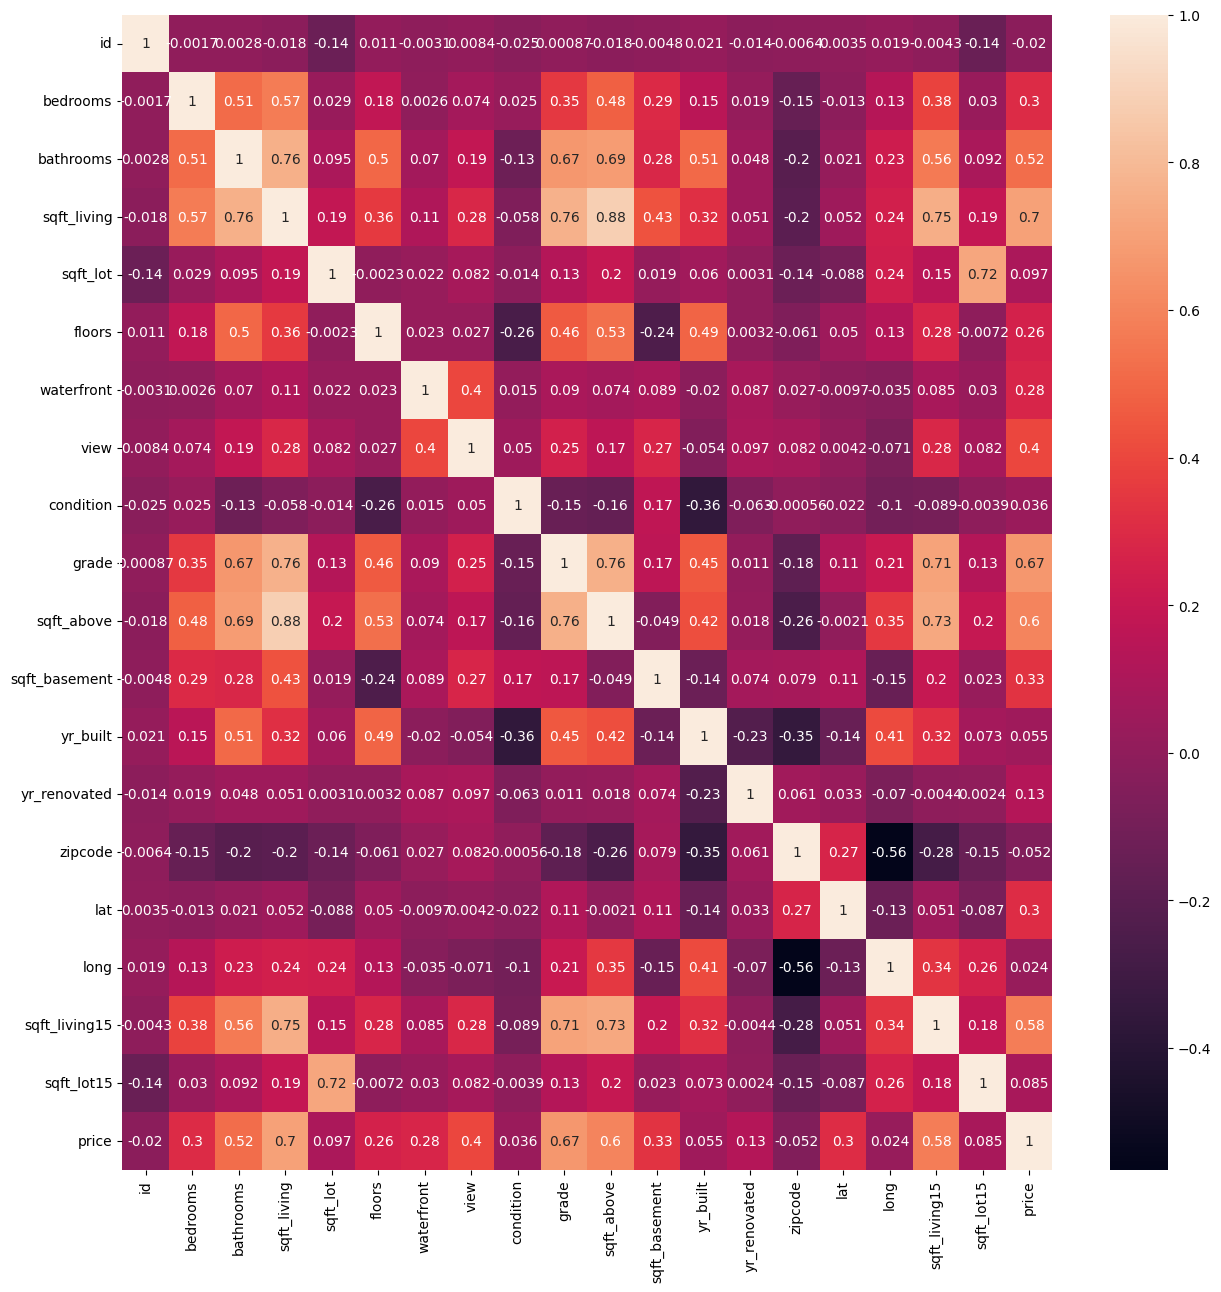

In [20]:

plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)

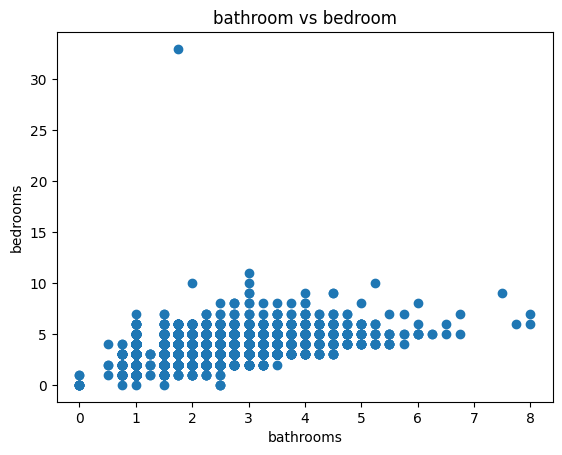

In [21]:
plt.scatter(data['bathrooms'],data['bedrooms'])
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.title('bathroom vs bedroom')
plt.show()

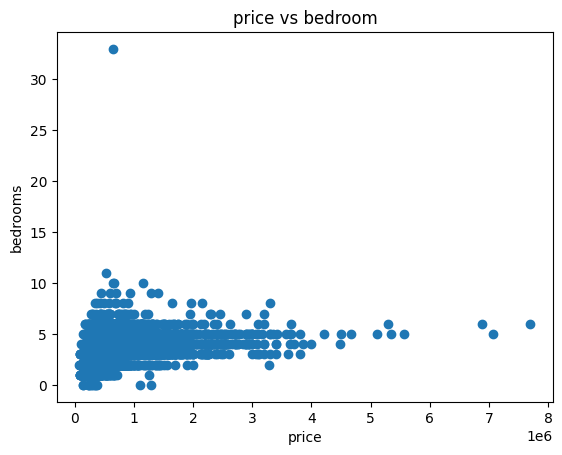

In [22]:
plt.scatter(data['price'],data['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedroom')
plt.show()

<Axes: xlabel='price', ylabel='Density'>

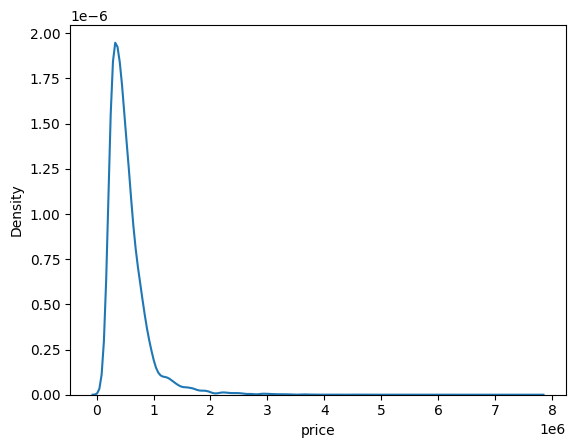

In [23]:
sns.kdeplot(data['price'])

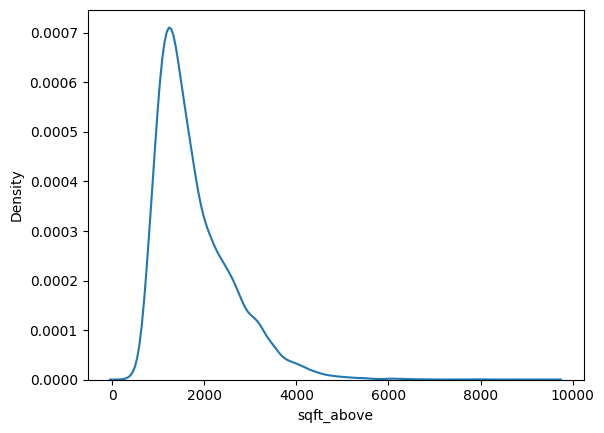

In [24]:
sns.kdeplot(data.sqft_above)
sns.set_style('ticks')

In [25]:
data[data['bedrooms']> 8 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,"(75000.0, 837500.0]"
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,"(75000.0, 837500.0]"
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,"(837500.0, 1600000.0]"
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,"(75000.0, 837500.0]"
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,"(75000.0, 837500.0]"
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,"(837500.0, 1600000.0]"
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,"(75000.0, 837500.0]"
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,"(75000.0, 837500.0]"
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,"(837500.0, 1600000.0]"
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,"(837500.0, 1600000.0]"


<Axes: xlabel='bedrooms', ylabel='Density'>

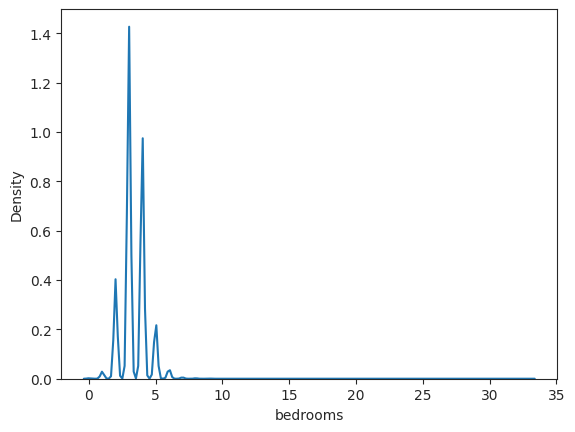

In [26]:
sns.kdeplot(data['bedrooms'])

In [27]:
data_bed_rm_ol = data[data['bedrooms'] <9]

<Axes: xlabel='bedrooms', ylabel='Density'>

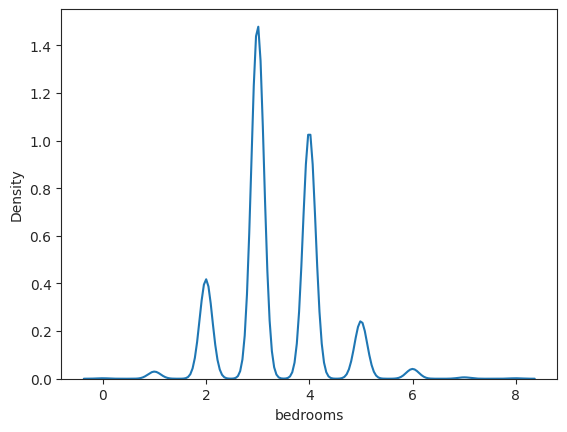

In [28]:
sns.kdeplot(data_bed_rm_ol['bedrooms'])

<Axes: xlabel='price', ylabel='Density'>

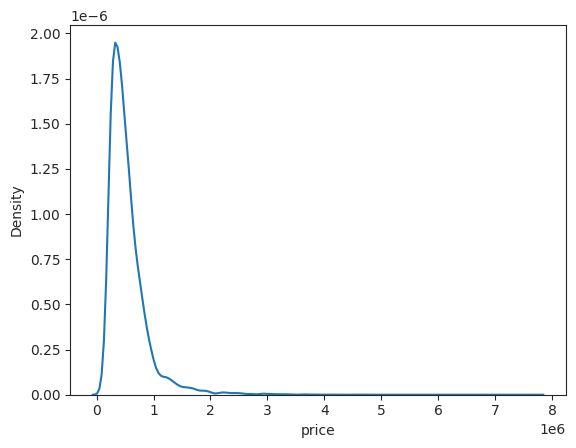

In [29]:
sns.kdeplot(data_bed_rm_ol['price'])

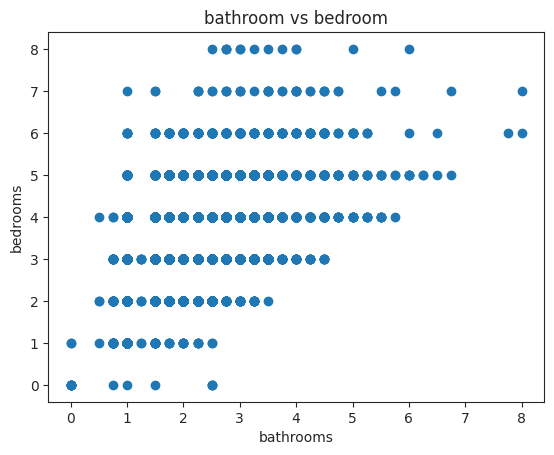

In [30]:
plt.scatter(data_bed_rm_ol['bathrooms'],data_bed_rm_ol['bedrooms'])
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.title('bathroom vs bedroom')
plt.show()

In [31]:
data.loc[(data['bathrooms'] <1) | (data['bedrooms'] < 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
208,1222000055,20141123T000000,180250.0,2,0.75,900,9600,1.0,0,0,...,900,0,1941,0,98166,47.4604,-122.339,1250,14280,"(75000.0, 837500.0]"
264,2123039032,20141027T000000,369900.0,1,0.75,760,10079,1.0,1,4,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,"(75000.0, 837500.0]"
350,7325600160,20140604T000000,299000.0,1,0.75,560,12120,1.0,0,0,...,560,0,1967,0,98014,47.6750,-121.854,1300,19207,"(75000.0, 837500.0]"
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,"(75000.0, 837500.0]"
569,4045500710,20141218T000000,405000.0,2,0.75,1160,15029,1.0,0,0,...,870,290,1937,0,98014,47.6929,-121.870,1870,25346,"(75000.0, 837500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,2114700090,20150301T000000,151000.0,2,0.75,720,5040,1.0,0,0,...,720,0,1949,0,98106,47.5323,-122.347,1290,4120,"(75000.0, 837500.0]"
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,290,0,1963,0,98024,47.5308,-121.888,1620,22850,"(75000.0, 837500.0]"
20017,1025039168,20140923T000000,290000.0,1,0.75,740,1284,1.0,0,0,...,740,0,1928,0,98107,47.6741,-122.406,1430,3988,"(75000.0, 837500.0]"
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"(75000.0, 837500.0]"


In [32]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])